## EDA에 이어서 모델링을 다중공선성 검사와 모델링을 실시한다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
os.chdir(r'C:\Users\hjb38\Documents\데이터 분석 과정\data\googleplaystore_data')

In [3]:
train = pd.read_csv('train.csv')

In [4]:
# Rating을 제외한 나머지를 input_var라는 변수에 넣어서 사용

input_var = ['Reviews', 'Size', 'Installs', 'Price', 'lastupdate',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_Free', 'Type_Paid',
       'Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+', 'Content Rating_Mature 17+',
       'Content Rating_Teen', 'Content Rating_Unrated', 'Genres_Action',
       'Genres_Adventure', 'Genres_Arcade', 'Genres_Art & Design',
       'Genres_Auto & Vehicles', 'Genres_Beauty', 'Genres_Board',
       'Genres_Books & Reference', 'Genres_Business', 'Genres_Card',
       'Genres_Casino', 'Genres_Casual', 'Genres_Comics',
       'Genres_Communication', 'Genres_Dating', 'Genres_Education',
       'Genres_Educational', 'Genres_Entertainment', 'Genres_Events',
       'Genres_Finance', 'Genres_Food & Drink', 'Genres_Health & Fitness',
       'Genres_House & Home', 'Genres_Libraries & Demo', 'Genres_Lifestyle',
       'Genres_Maps & Navigation', 'Genres_Medical', 'Genres_Music',
       'Genres_News & Magazines', 'Genres_Parenting', 'Genres_Personalization',
       'Genres_Photography', 'Genres_Productivity', 'Genres_Puzzle',
       'Genres_Racing', 'Genres_Role Playing', 'Genres_Shopping',
       'Genres_Simulation', 'Genres_Social', 'Genres_Sports',
       'Genres_Strategy', 'Genres_Tools', 'Genres_Travel & Local',
       'Genres_Trivia', 'Genres_Video Players & Editors', 'Genres_Weather',
       'Genres_Word']

## 2.4. 다중공선성 검사

만약 인풋변수들 끼리 서로 상관성이 높으면 shap value시 모델을 해석하는 데에 어려움이 있을 수 있다.
때문에 모델링 전에 서로 높은 상관성을 띄는 변수들을 제거해준다.

In [5]:
# corr()로 상관계수 확인
corr = train[input_var].corr()

# 시각화
corr.style.background_gradient(cmap='coolwarm')

# 붉은 색일수록 상관계수가 높다.

1차 확인 결과 Category와 Genres 간의 상관계수가 대부분이 1이거나 1에 가까우므로
<br> Genres관련 변수들을 모두 지워주고 다시 살펴본다.

In [6]:
genres = ['Genres_Action',
       'Genres_Adventure', 'Genres_Arcade', 'Genres_Art & Design',
       'Genres_Auto & Vehicles', 'Genres_Beauty', 'Genres_Board',
       'Genres_Books & Reference', 'Genres_Business', 'Genres_Card',
       'Genres_Casino', 'Genres_Casual', 'Genres_Comics',
       'Genres_Communication', 'Genres_Dating', 'Genres_Education',
       'Genres_Educational', 'Genres_Entertainment', 'Genres_Events',
       'Genres_Finance', 'Genres_Food & Drink', 'Genres_Health & Fitness',
       'Genres_House & Home', 'Genres_Libraries & Demo', 'Genres_Lifestyle',
       'Genres_Maps & Navigation', 'Genres_Medical', 'Genres_Music',
       'Genres_News & Magazines', 'Genres_Parenting', 'Genres_Personalization',
       'Genres_Photography', 'Genres_Productivity', 'Genres_Puzzle',
       'Genres_Racing', 'Genres_Role Playing', 'Genres_Shopping',
       'Genres_Simulation', 'Genres_Social', 'Genres_Sports',
       'Genres_Strategy', 'Genres_Tools', 'Genres_Travel & Local',
       'Genres_Trivia', 'Genres_Video Players & Editors', 'Genres_Weather',
       'Genres_Word']

train = train.drop(labels = genres, axis = 1)
# train = train.drop(labels = genres, axis = 1)
# test = test.drop(labels = genres, axis = 1)

In [7]:
train.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'lastupdate',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_Free', 'Type_Paid',
       'Content Rating_A

In [8]:
input_var = ['Reviews', 'Size', 'Installs', 'Price', 'lastupdate',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_Free', 'Type_Paid',
       'Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+', 'Content Rating_Mature 17+',
       'Content Rating_Teen', 'Content Rating_Unrated']

In [9]:
# corr()로 상관계수 확인
corr = train[input_var].corr()

# 시각화
corr.style.background_gradient(cmap='coolwarm')

,Reviews,Size,Installs,Price,lastupdate,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
Reviews,1.000000,0.073765,0.624037,-0.020464,0.069107,-0.010046,-0.011458,-0.008910,-0.011472,-0.020021,-0.008719,0.077830,-0.014861,-0.008684,0.004801,-0.009443,-0.041285,-0.020780,-0.010233,0.076012,-0.014854,-0.009885,-0.010723,-0.021055,-0.006432,-0.024293,-0.011469,-0.009345,-0.007314,0.013268,-0.007004,-0.000634,0.069585,-0.010936,0.009978,-0.008657,0.013665,-0.004037,0.034233,-0.034233,-0.002205,-0.060534,0.040025,-0.001301,0.052828,-0.001417
Size,0.073765,1.000000,0.035548,0.000647,0.209654,-0.034124,0.000622,-0.019844,-0.049297,-0.063846,-0.030344,-0.079683,-0.022658,-0.013625,0.008656,-0.024316,0.177052,-0.030244,0.005183,0.356928,0.004375,-0.015266,-0.038527,-0.052433,-0.023977,-0.022415,-0.067418,0.000654,-0.089279,-0.048034,-0.085643,-0.034236,-0.030594,0.042486,-0.190537,0.024187,-0.035440,-0.037523,0.010862,-0.010862,-0.001449,-0.224442,0.139363,0.044270,0.169113,-0.007782
Installs,0.624037,0.035548,1.000000,-0.026057,0.081818,-0.010740,-0.013770,-0.010532,0.001665,-0.020440,-0.011684,0.104603,-0.018011,-0.012862,0.022230,-0.011269,-0.054422,-0.025426,-0.012828,0.036636,-0.013534,-0.011426,-0.012659,-0.024883,-0.010217,-0.029782,0.006652,-0.011522,-0.013332,0.026538,0.033718,-0.003625,0.048828,-0.015450,0.010464,0.016507,0.040382,-0.006745,0.043357,-0.043357,-0.002800,-0.044933,0.013432,-0.008646,0.054100,-0.001733
Price,-0.020464,0.000647,-0.026057,1.000000,-0.087170,-0.009914,-0.014493,-0.011986,-0.013607,-0.007297,-0.013601,-0.009379,-0.012072,-0.010651,-0.014197,-0.012409,0.024616,-0.018795,-0.012953,-0.003318,-0.013482,-0.014581,-0.014699,-0.004901,-0.005878,0.181577,-0.025068,-0.005304,0.009292,-0.004462,-0.008765,-0.022663,-0.025811,0.003404,-0.005178,-0.009642,-0.017681,0.004222,-0.599700,0.599700,-0.003196,0.007293,0.013840,-0.005541,-0.013622,-0.001845
lastupdate,0.069107,0.209654,0.081818,-0.087170,1.000000,0.033124,0.038320,0.024565,-0.028210,0.000984,0.031753,-0.004259,0.061394,0.006976,0.050803,0.026592,-0.066038,0.055389,0.051297,-0.039648,0.040384,0.010799,-0.037024,-0.011400,0.028819,-0.017199,0.045828,0.031483,-0.086117,0.005076,-0.010190,0.062333,0.030846,0.030418,-0.064932,0.038186,-0.012890,0.004012,0.168742,-0.168742,0.011994,-0.055942,0.007732,0.050099,0.034189,-0.055879
Category_ART_AND_DESIGN,-0.010046,-0.034124,-0.010740,-0.009914,0.033124,1.000000,-0.008162,-0.006179,-0.012493,-0.015677,-0.007012,-0.015460,-0.011100,-0.010406,-0.009665,-0.006397,-0.042467,-0.016666,-0.009274,-0.030470,-0.015082,-0.007517,-0.007578,-0.016666,-0.010406,-0.016490,-0.013756,-0.006745,-0.016666,-0.015677,-0.016812,-0.012902,-0.013721,-0.015584,-0.026661,-0.013156,-0.011676,-0.008105,0.007262,-0.007262,-0.001648,0.027510,-0.009366,-0.018375,-0.016788,-0.000951
Category_AUTO_AND_VEHICLES,-0.011458,0.000622,-0.013770,-0.014493,0.038320,-0.008162,1.000000,-0.006821,-0.013791,-0.017306,-0.007740,-0.017067,-0.012254,-0.011487,-0.010670,-0.007062,-0.046880,-0.018398,-0.010238,-0.033636,-0.016649,-0.008298,-0.008365,-0.018398,-0.011487,-0.018204,-0.015185,-0.007446,-0.018398,-0.017306,-0.018559,-0.014243,-0.015147,-0.017204,-0.0294

높은 상관성을 띄는 변수는 다음과 같다.

- Installs, Reviews
- Price, Category_MEDICAL
- Price, Type_Paid
- Category_GAME, Size
- Category_DATING, Content Rating_Mature 17+
- Content Rating_Teen, Category_ENTERTAINMENT

각 쌍 중 하나의 변수만 제거해야한다. 그 기준은 타겟값과의 상관계수.<br>
상관계수의 절대값이 더 작은 것을 제거한다.<br>
타겟값 : Raiting

In [10]:
train['Installs'].corr(train['Rating'])

0.03999616130530174

In [11]:
train['Reviews'].corr(train['Rating'])

0.054982439231152556

In [61]:
# Installs 를 제거
del train['Installs']

In [62]:
train['Price'].corr(train['Rating'])

0.023294127959477377

In [63]:
train['Category_MEDICAL'].corr(train['Rating'])

-0.0026196660345572807

In [64]:
train['Type_Paid'].corr(train['Rating'])

0.04972559520468844

In [65]:
# Price에 비해 Category_MEDICAL이 타겟값과의 상관은 가장 적으나,
# Price와 Type_Paid를 비교했을 때는 Price를 제거해야 하므로
# Price만 제거하고 Category_MEDICAL은 남겨둔다.
del train['Price']

In [66]:
train['Category_GAME'].corr(train['Rating'])

0.04851289628116336

In [67]:
train['Size'].corr(train['Rating'])

0.05914755062832313

In [68]:
# Category_GAME 을 제거
del train['Category_GAME']

In [69]:
train['Category_DATING'].corr(train['Rating'])

-0.04899856124369869

In [70]:
train['Content Rating_Mature 17+'].corr(train['Rating'])

-0.02071588888214758

In [71]:
# Content Rating_Mature 17+ 을 제거
del train['Content Rating_Mature 17+']

In [72]:
train['Content Rating_Teen'].corr(train['Rating'])

0.034250005007079434

In [73]:
train['Category_ENTERTAINMENT'].corr(train['Rating'])

-0.008081184537865537

In [74]:
# Category_ENTERTAINMENT 를 제거
del train['Category_ENTERTAINMENT']

In [75]:
# 인풋변수 다시 지정
train.columns

Index(['Rating', 'Reviews', 'Size', 'lastupdate', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_EVENTS', 'Category_FAMILY', 'Category_FINANCE',
       'Category_FOOD_AND_DRINK', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_Free', 'Type_Paid',
       'Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Ever

In [76]:
input_var = ['Reviews', 'Size', 'lastupdate', 'Type_Free', 'Type_Paid',
       'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_EVENTS', 'Category_FAMILY', 'Category_FINANCE',
       'Category_FOOD_AND_DRINK', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 
       'Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+', 'Content Rating_Teen',
       'Content Rating_Unrated']

## 2.5. 모델링(XGBoost)

<strong>Xgboost를 사용하는 이유</strong> <br>
: shap value를 활용하기 위해서는 모델이 랜덤포레스트 형태의 tree형 모델이어야 한다. <br>
그 중 Xgboost가 속도가 빠르면서도 높은 성능을 유지하므로 이를 선택했다.

In [77]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

### 2.5.1. XGBoost

In [78]:
X = train[input_var]
y = train['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape

(5722, 41)

In [79]:
xgb = XGBRegressor(n_estimators=500, learning_rate=0.1)
xgb.fit(train[input_var], train['Rating'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### 2.5.1. 추가 변수 선택

In [80]:
# 1차적으로 변수중요도를 기준으로 데이터프레임 작성
imp_df = pd.DataFrame({'var':input_var,
                       'imp':xgb.feature_importances_})

In [81]:
# 큰 값부터 순서대로 정렬
imp_df = imp_df.sort_values(['imp'], ascending=False)

In [82]:
score_list = []
selected_varnum = []

for i in range(1,42):
    selected_var = imp_df['var'].iloc[:i].to_list()
    scores = cross_val_score(xgb,
                             train[selected_var],
                             train['Rating'],
                             scoring='neg_mean_squared_error', cv=3)
    
    score_list.append(-np.mean(scores)) # 각 라운드를 진행했을 때 cross_val_score의 평균은 얼마인가?
                                        # 위에는 neg(네거티브)를 사용했기 때문에 한 번 더 - 를 붙여 양수로 만든다.
    selected_varnum.append(i)  # 몇개의 변수를 선택하나?
    #print(i) # 프린트는 진행도를 보기 위해 적은 것

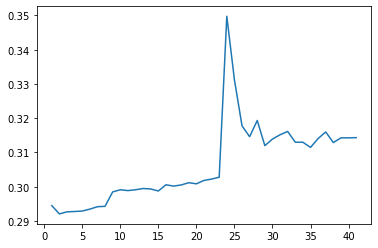

In [83]:
plt.plot(selected_varnum, score_list)

In [84]:
# neg_mean_squared_error 가 가장 낮은 상위 33개만 사용
input_var = imp_df['var'].iloc[:33].tolist()

### 2.5.2. XGBoost

In [85]:
X = train[input_var]
y = train['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape

(5722, 33)

In [86]:
xgb = XGBRegressor(n_estimators=500, learning_rate=0.1)
xgb.fit(train[input_var], train['Rating'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### (오차 크기)

In [87]:
y_pred = xgb.predict(X_test)
y_true = y_test

In [88]:
rmse = mean_squared_error(y_true, y_pred, squared=False)
rmse

0.28667860064427036

모델을 통해 Rating(1~5점)을 예측하는데에 0.27 ~ 0.29점의 오차가 발생한다.

## 2.6. shap value를 이용한 시각화

shap value를 활용하면 인풋변수들 중 어떤게 타겟값에 큰 영향을 미치는 알 수 있다.

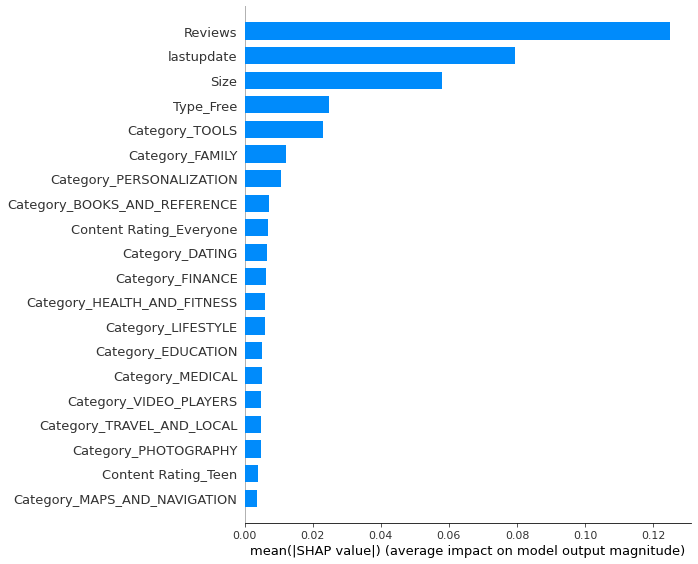

In [89]:
import shap
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train[input_var])
shap.summary_plot(shap_values, X_train[input_var], plot_type='bar')

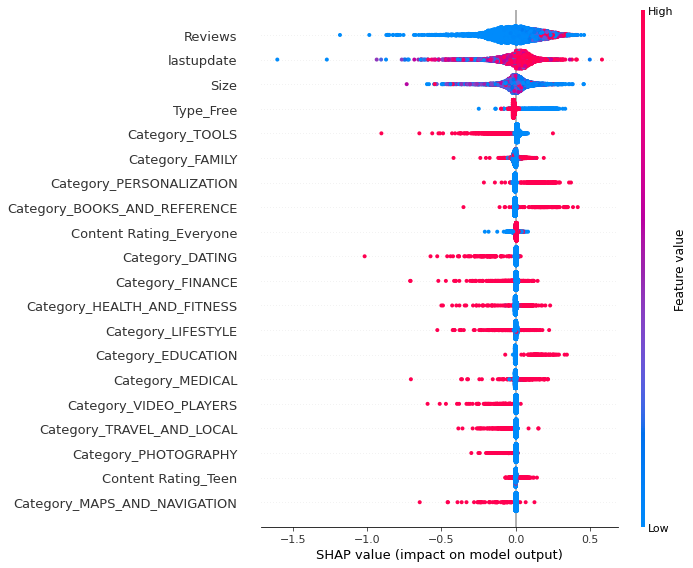

In [90]:
shap.summary_plot(shap_values, X_train[input_var])

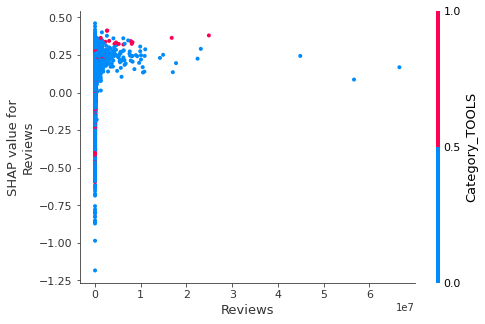

In [91]:
shap.dependence_plot('Reviews', shap_values, X_train[input_var])

- x값은 1000만 단위로 표시됐다.
- 리뷰 수가 약 100만 이상일 경우 안정적으로 점수에 긍정적인 영향을 주지만, 리뷰가 많을 수록 점수가 더 높아지는 것은 아니다.

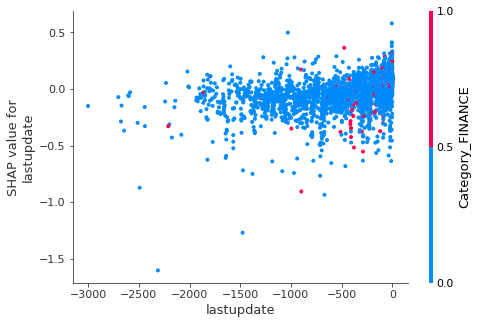

In [92]:
shap.dependence_plot('lastupdate', shap_values, X_train[input_var])

- x값이 0에 가까울 수록 최근에 업데이트 한 것이다.
- 약 100일 안에 업데이트를 했을 경우 점수에 긍정적인 영향이 더 크지만,
- 100일 이상이 되면 부정적인 영향이 많아진다.

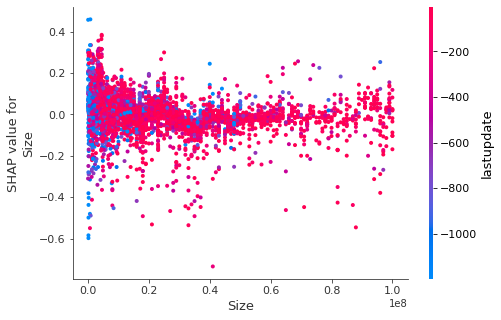

In [93]:
shap.dependence_plot('Size', shap_values, X_train[input_var])

- x값 0.1은 10M이다.
- EDA단계에서 앱용량이 클수록 점수에 긍정적인 영향이 더 큰 것으로 확인됐지만, shap value를 통해 확인한 결과 반드시 그런것은 아니다.
- 용량이 15M이하일 때 더 높은 점수를 받으며, 그보다 클 때는 점수에 별다른 영향을 주지는 못한다.

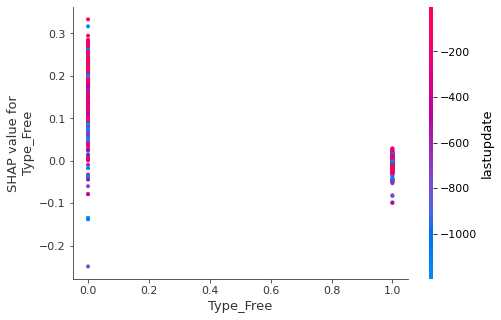

In [94]:
shap.dependence_plot('Type_Free', shap_values, X_train[input_var])

- x값이 0이면 무료가 아니고(유료), 1이면 무료다.
- 무료보다는 유료앱이 좋은 점수를 받는데 유리함을 알 수 있다. 

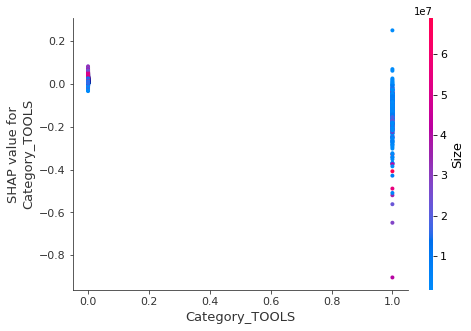

In [95]:
shap.dependence_plot('Category_TOOLS', shap_values, X_train[input_var])

- x값이 0이면 카테고리가 TOOLS 이외의 것들이고, 1이면 TOOLS이다.
- TOOLS 카테고리의 앱은 좋은 점수를 받지 못한다.

# 3. 분석 결과

### 3.1. EDA와 머신러닝을 종합적으로 분석하여 판단한 높은 점수를 받기 위한 조건들은 다음과 같다.

1. 100만개 이상의 리뷰
2. 카테고리가 HEALTH_AND_FITNESS, BOOKS_AND_REFERENCE, EVENTS, PERSNALIZATION, EDUCATION 일 수록 유리
3. TOOLS와 DATING 카테고리는 피할 것
4. 15M 이하의 용량
5. 5000회 이상의 install
6. 유료(3달러 이하)
7. 이용등급이 Teen, Everyone 10+, Everyone
8. 적어도 100일 마다 업데이트

### 3.2. 분석 결과를 바탕으로 앱 개발시 고려해야할 사항으로는

- HEALTH_AND_FITNESS, BOOKS_AND_REFERENCE, EVENTS, PERSNALIZATION, EDUCATION 카테고리에 부합하는 앱을 만든다.
- 앱의 용량이 너무 커지지 않도록 하도록 한다.
- 이용자가 리뷰를 남길 수 있도록 유도하는 시스템을 갖춘다.
- 3달러 이하의 유료 서비스로 출시한다.
- 이용등급은 Teen, Everyone 10+, Everyone에 부합하도록 만든다.

### 3.3. 이미 앱을 출시하여 서비스하고 있다면

- 현재보다 앱을 더 경량화 할 수 있도록 개선한다.
- 이용자가 리뷰를 남길 수 있도록 유도하는 시스템을 갖춘다.
- 만약 이용등급이 Mature 17+, Adults only 18+ 라면 폭력성, 선정성 등을 낮춰 Teen, Everyone 10+, Everyone 등급으로 조정하는 방안을 고려해본다.
- 주기적인 업데이트를 통해 앱의 성능을 지속적으로 개선한다.

# 4. 프로젝트 진행에서의 한계점

## 4.1. 중복된 데이터들

크롤링 과정에서 중복집계된 것으로 추측되는 데이터들이 있어 이를 제거해주는 과정이 필요했다. <br>
다행히 Tableau를 통해 해당 앱들을 찾아내고 제거 과정도 간단했지만, 우연히 앱 이름만 일치하고 실제로는 전혀 다른 앱들이 그 중에 있었을 가능성을 전혀 배제할 수는 없다.

## 4.2. '점수'에 대한 이상치 제거의 어려움

점수는 개인의 주관적인 경험과 판단에 의해 매겨지는 것으로, '점수가 너무 낮거나 높다고 해서 이를 이상치로 볼 수 있는가?'에 대한 딜레마가 있었다.<br>
고민 끝에 그러한 것들도 중요한 데이터라 판단해 제거하지 않기로 결정했다.

## 4.3. EDA와 Shap value 결과의 차이

Size에 대한 EDA의 결과와 Shap value로 본 결과가 정반대로 나와 해석에 어려움을 겪었다. <br>
그러나 데이터 분석의 결과가 완전히 선형적인 경우는 흔치 않기 때문에 복합적으로 판단할 수 있는 shap value의 결과를 따르기로 했다.